In [281]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re
from matplotlib.legend_handler import HandlerLine2D

In [172]:
v=r"/home/sebastian/Downloads/smieci"
for root, dirs, files in os.walk(v):
    k=files

In [225]:
data=[0]*5
lees=[0]*5

for i in range(len(k)):
    strr=v+"/"+k[i]
    data[i]=pd.read_csv(strr)
    data[i]['mean']=data[i].iloc[:,2:].apply(np.mean, axis=1)
    
    x=k[i] #Mogłem użyć enumerata
    lees[i]=x[:re.search('\.', x).span()[0]]

vv=[0]*len(k)
vz=[0]*len(k)
for i, x in enumerate(data):
    vz[i]=list(data[i].iloc[199,2:])
    vv[i]=-np.mean(vz[i])
    #print(vv[i], ggizi[lees[i]][0])

sv=zip(data, lees, vv, vz)
sv=sorted(sv, key=lambda x: x[2])

sv=tuple(zip(*sv))
data, lees, vv, vz=sv

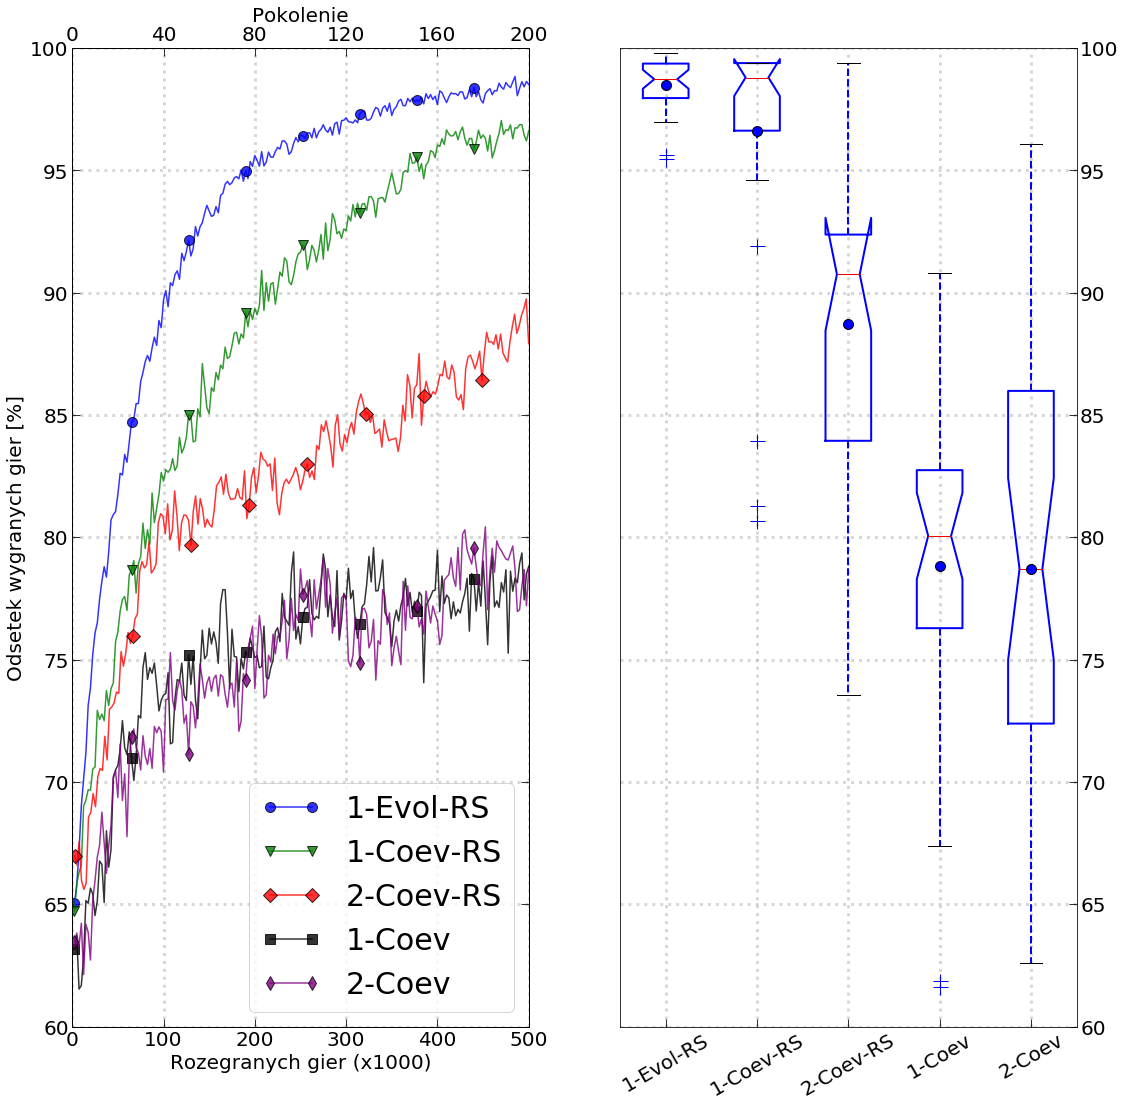

In [362]:
ggizi={'rsel':('1-Evol-RS', 'b', 'o'), 'cel':('1-Coev', 'black', 's'),
       '2cel':('2-Coev', 'purple', 'd'), 'cel-rs':('1-Coev-RS', 'g', 'v'),
       '2cel-rs':('2-Coev-RS', 'r', 'D')}


plt.rcParams["font.family"] = "sans-serif"
plt.rcParams["font.size"] = 20

fig, ax=plt.subplots(1,2,figsize=(18,18))
ax[0].set_xlabel('Rozegranych gier (x1000)')
ax[0].set_ylabel('Odsetek wygranych gier [%]')

f=[0]*len(k)
for j in range(len(k)):
    f[j]=data[j]['mean']
    
bbox_props = {'color':'b', 'linewidth':2}
ww_props={'linestyle':'--', 'color':'b', 'linewidth':2}
meanpointprops = {'marker':'o', 'markeredgecolor':'black', 'markerfacecolor':'blue', 'markersize':10}
medianprops = {'color': '#EE0000'}
flierprops= {'markeredgecolor':'blue', 'marker':'+', 'markersize':15}
ax[1].boxplot(vz, notch=True, showmeans=True, flierprops=flierprops, meanprops=meanpointprops, boxprops=bbox_props, whiskerprops=ww_props, medianprops=medianprops)

for i in range(2):
    ax[i].grid(linestyle=":", linewidth=3, alpha=0.5)
    ax[i].set_ylim(0.6,1)
    ax[i].set_yticklabels(list(range(60, 105, 5)))
    ax[i].tick_params(direction='in', length=8)
ax[0].set_xlim(0, 500000)

gg=[0]*5
md={}
for i in range(len(k)):
    gg[i], =ax[0].plot(data[i]['effort'], data[i]['mean'], color=ggizi[lees[i]][1], label=ggizi[lees[i]][0], marker=ggizi[lees[i]][2], mec='black', markersize=10, markevery=25, alpha=0.8)
    md[gg[i]]=HandlerLine2D(numpoints=2)

ax[0].set_xticklabels(list(range(0, 600, 100)))
ax[1].set_xticklabels([ggizi[x][0] for x in lees], rotation=30)
ax[0].legend(loc=4, prop={'size':30}, handler_map={**md})
ax[1].yaxis.tick_right()



tax=ax[0].twiny()
tax.set_xlabel('Pokolenie')
tax.set_xticklabels(range(0, 210, 40))
tax.tick_params(direction='in', length=8)

tax=ax[0].twinx()
tax.set_yticklabels([])
tax.set_yticks(range(9))
tax.tick_params(direction='in', length=8)

plt.show()

In [166]:
print(list(data[4].iloc[199,2:]))

[0.7972, 0.804, 0.6744, 0.7607, 0.8129, 0.7796, 0.9082, 0.8267, 0.6824, 0.7315, 0.8371, 0.8702, 0.8188, 0.7629, 0.8689, 0.8039, 0.8634, 0.7687, 0.8087, 0.6164, 0.8275, 0.7741, 0.9014, 0.868, 0.8213, 0.77, 0.6185, 0.7632, 0.74, 0.8006, 0.674, 0.8673, 0.788203125]


In [206]:
[ggizi[lees[i]][0] for x in lees]

['2-Coev', '2-Coev', '2-Coev', '2-Coev', '2-Coev']

In [290]:
print(gg[0])

Line2D(2-Coev)
